# Lab 4

In Tuesday's class you had learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Exercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 

## Lab Setup

In [1]:
import pandas as pd
import numpy as np
rng_seed = 42
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
import zipfile
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import otter
grader = otter.Notebook()

In [2]:
# set up random number generator 
rng = np.random.default_rng(rng_seed)

## Examples 

### Importing datafiles



#### Importing Excel files
For importing the files as with multiple sheet in excel workbook, in Python 3.0+, you can use `pd.read_excel()`.

For example, if workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use `pd.read_excel('workbook.xlsx', 'Sheet1')` or  `('workbook.xlsx', 'Sheet2')`. 



#### Importing from Zipped files 

Now, try importing csv file present inside the zip file named 'avocado' directly (make use of 'zipfile' module).
* https://docs.python.org/3/library/zipfile.html

In [3]:
# Example code of how to load in data stored within a zip-file
# import zipfile  # already imported above 
zf = zipfile.ZipFile('data/avocado.zip')
avacado = pd.read_csv(zf.open('avocado.csv'), index_col = 0)
avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### System information 

If you ever need to check which version of Python or what version of a module you are working with you can use something similar to the following code. 

In [4]:
# Get to know your system versions
# import sys  # already imported above
print('Python version:', sys.version, '\n')
print('Pandas version:', np.__version__ , '\n')
print('Seaborn version: ', sns.__version__, '\n')

Python version: 3.10.11 | packaged by conda-forge | (main, May 10 2023, 18:58:44) [GCC 11.3.0] 

Pandas version: 1.24.3 

Seaborn version:  0.12.2 



Let's load the wine data again.

In [5]:
# Load wine data 
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1599, 12)

# Inferential Statistics

The piece of code below is adapted from `nb.week4.ipynb` class material. A sample of size 5 is selected and the mean is calculated.  This is repeated 1000 times, collecting the sample means. 
A histogram function is invoked for sampled means. 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?

mean pH, mu = 3.3111131957473416


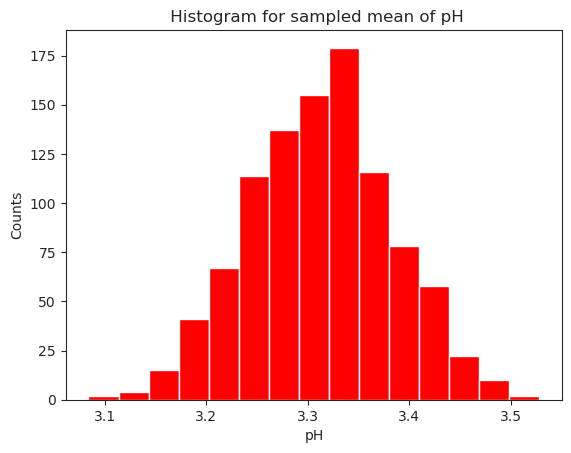

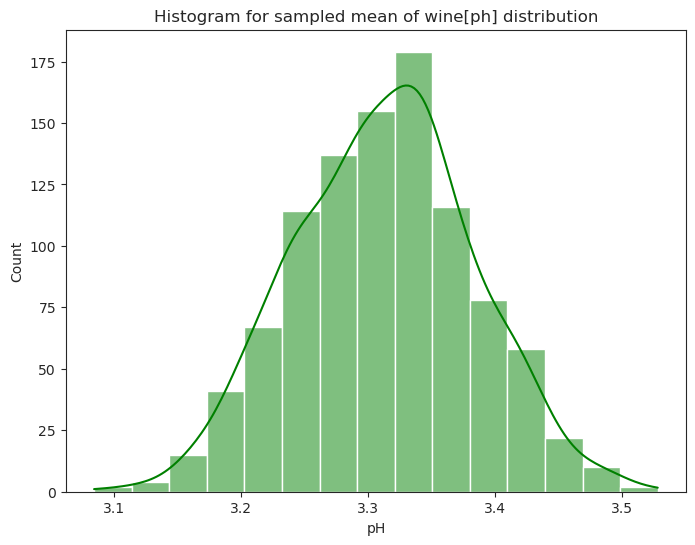

In [40]:
'''The piece of code from nb.week3.ipynb is provided, use it to  
compute the mean for the 'n' random samples and store in array, means[i]
This is repeated 'N_tests' times. '''

mu = wine["pH"].mean()                                # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                        # Num of test to perform
n = 5                                                 # number of samples
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    
# Histogram in Matplotlib    
nbins = 15
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')
plt.xlabel('pH')
plt.ylabel('Counts')

# Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='green', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()

### Central Limit Theorem

From Chap 4, we had a chance to look into Central Limit Theorem. The initial population distribution was not observed in the class and the mean sampled distribution, i.e., mean of `wine['pH']`, evidently displayed normal distribution (see the plots above).



<!-- BEGIN QUESTION -->

## Exercise 1

Check what was the distribution of the initial population ? Create the  Histogram and read the discussion below.

https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

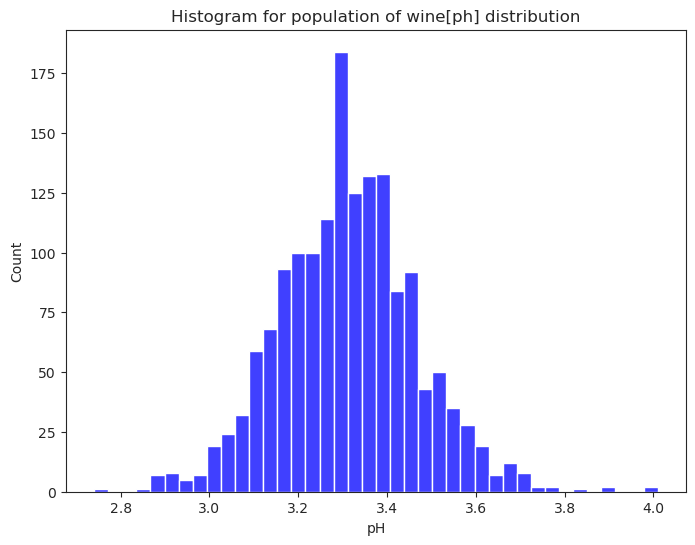

In [8]:
# Plot the distribution of the population itself i.e., wine['pH']. 
#  Use seaborn rather than matplotlib to create the histogram

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(data=wine['pH'],  color ='blue')
plt.title('Histogram for population of wine[ph] distribution')
plt.xlabel('pH')

plt.show()


<!-- END QUESTION -->

Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with Central Limit Theorem?

For options regarding random numbers generation in certain distribution pattern, see the link:  
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

*Think about:* What if the initial population is other than normal distribution. Would CLT come into picture? 



## Exercise 2 - Uniform distribution

In Exercise 1, the distribution of wine pH values is approximately normal.  What about if this data follows another distribution?  How does it affect the distribution of the sampled means?

Let's look if the initial data came from a Uniform distribution.

### Exercise 2A - Create distribution

Create a DataSeries sampling 1000 numbers from the uniform distribution. 

In [9]:
# Create a pandas DataSeries - created using random numbers 
#  Sample 1000 numbers from the uniform distribution - unif(0,1) 
#  Hint: look at using the random number generator
#   seeded above:  rng.uniform()

s = pd.Series(rng.uniform(0,1, 1000))

s.head()

0    0.033878
1    0.683015
2    0.950496
3    0.829150
4    0.277198
dtype: float64

In [10]:
grader.check("q2a")

q2a results: All test cases passed!

### Exercise 2B - Histogram 

Create a histogram of the samples stored in `s` above (the values sampled from the uniform distribution). 

<!-- BEGIN QUESTION -->



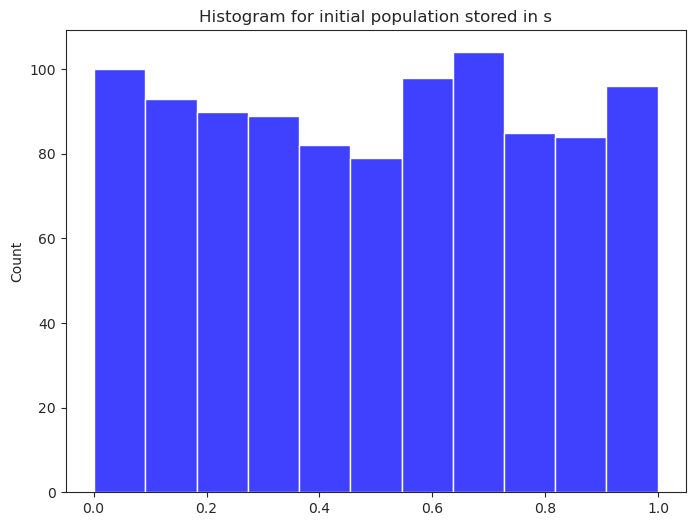

Ellipsis

In [11]:
# Plot a histogram for the initial population, stored in 's'
#  Use seaborn for the plot 
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.histplot(data=s,color='blue')
fig.set_size_inches(8, 6)
plt.title('Histogram for initial population stored in s')
plt.show()
...


<!-- END QUESTION -->

### Exercise 2C - Histogram of Sampled Means

Create a histogram of the sampled means. 

<!-- BEGIN QUESTION -->



mean population, mu = 0.4963409482555792


Ellipsis

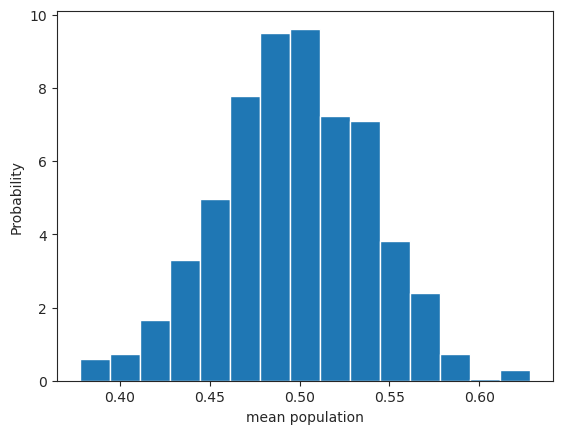

In [12]:
# In this cell, collection of 'n' random samples 'N-test' times 
#  storing the mean of each collection in the array.  
# Then, create a histogram of the sampled means. 

# As a start I have copied the most of the code for where this was done for wine-pH.  
# Modify it to get the sample means of the uniformly distributed sample population.

mu = s.mean()
print("mean population, mu = " + str(mu))

N_tests = 1000
n = 50 
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15
# Create a histogram of the sampled means from the uniform distribution
plt.hist(means,nbins,density=True)
plt.ylabel('Probability')
plt.xlabel('mean population')
...


<!-- END QUESTION -->

#####  Once the code is up and running. Examine the following for better understanding. 
 * How is plot sensitive for 'n' - no of samples drawn from population?
 * How does the profile change when 'N_test' - is increased or decreased?

## Exercise 3 - Gamma distributions

Let's examine this again if the initial data is from a Gamma distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

In [13]:

# To try Gamma distribution function - np.random.gamma
#   with the random number generator - rng.gamma

s = pd.Series(rng.gamma(2,2,5000))
s.head()


0    3.627469
1    1.138921
2    0.258975
3    0.849255
4    8.475434
dtype: float64

In [14]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Exercise 3B - Histogram 

Create a histogram of the samples stored in `s` above (the values sampled from the gamma distribution). 

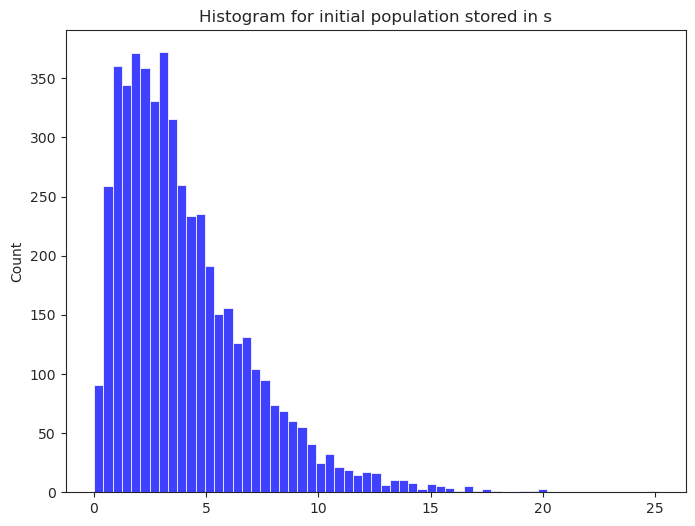

Ellipsis

In [15]:
# Histogram plot of initial population
#  Use seaborn for the plot
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.histplot(data=s,color='blue')
fig.set_size_inches(8, 6)
plt.title('Histogram for initial population stored in s')
plt.show()
...


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Exercise 3C - Histogram of Sampled Means

Create a histogram of the sampled means.

mean of random dataset, mu = 4.010088869965802


Ellipsis

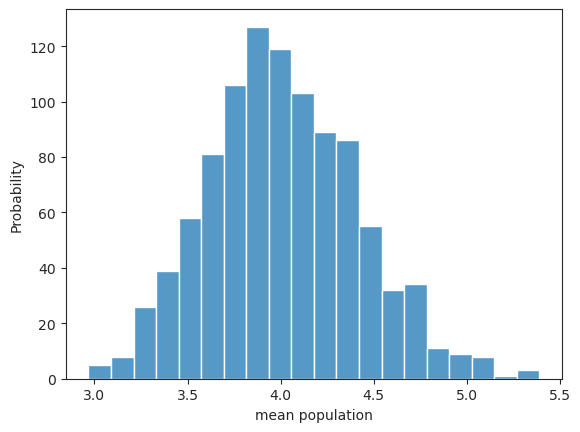

In [16]:
# Perform the similar operation as above but on a different distribution, e.g., gamma. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.

mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()



# Histogram of sampled means 
 


sns.histplot(data= means, bins=20)
plt.ylabel('Probability')
plt.xlabel('mean population')
...


<!-- END QUESTION -->

## Exercise 4 - Wald distributions

Let's examine this again if the initial data is from a Wald distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

In [17]:

# Perform the similar operation as above but on a different distribution, e.g., wald. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.
s 

# To try Wald distribution function - np.random.wald
#  use the random number generator - rng.wald 

s = pd.Series(rng.wald(3,2,100000))
s

0        2.883868
1        2.652752
2        0.629714
3        2.908177
4        1.219464
           ...   
99995    3.940243
99996    3.795515
99997    1.237891
99998    1.393138
99999    5.553590
Length: 100000, dtype: float64

In [18]:
grader.check("q4a")

q4a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Exercise 4B 

Repeat the analysis from above using the Wald distribution. 

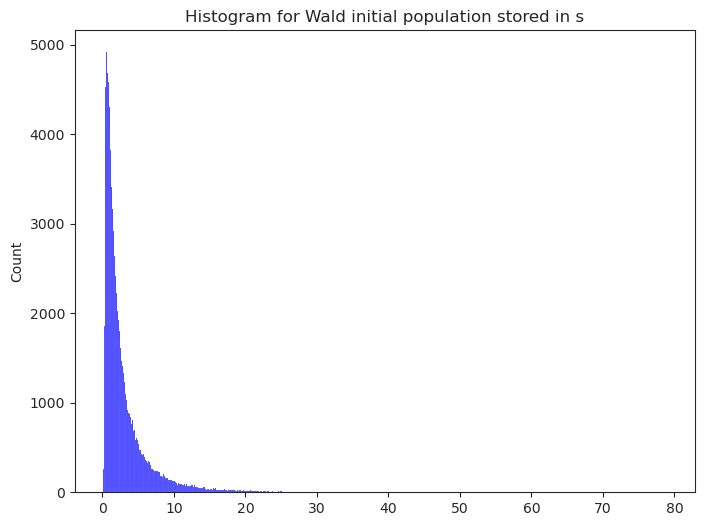

In [19]:
# Histogram plot of initial population
#  Use seaborn for the plot

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.histplot(data=s,color='blue')
fig.set_size_inches(8, 6)
plt.title('Histogram for Wald initial population stored in s')
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Exercise 4C 

Repeat the analysis from above. 

mean of random dataset, mu = 3.0149374157377276


Text(0.5, 0, 'mean population')

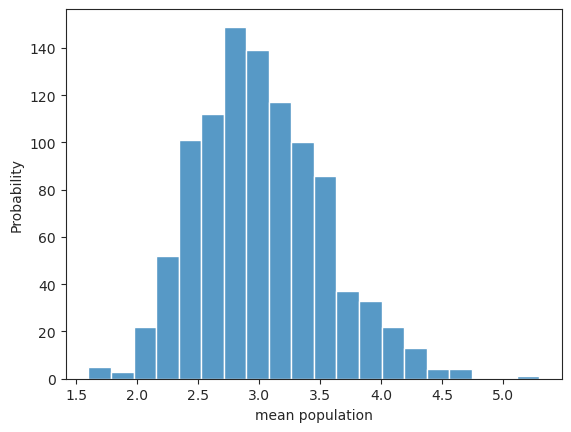

In [20]:
# Perform the similar operation as above but on a different distribution, e.g., wald. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.

mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()





# Histogram of sampled means 
 
sns.histplot(data= means, bins=20)
plt.ylabel('Probability')
plt.xlabel('mean population')


<!-- END QUESTION -->

## Measuring Variability of Estimates

Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  



<!-- BEGIN QUESTION -->

## Exercise 5 - Confidence Intervals

Refer to section 4.3.1 and 4.3.2 in the textbook and from `nb.week4` notebook. 

**Q** Explain in words (in the below Markdown cell), what is a Confidence Interval? 

**Q** What does it mean 95% C.I ? 

**ANSWER HERE:**

* A confidence interval is  ...

* 95% CI ... 

<!-- END QUESTION -->

### Example - Confidence Intervals

Spend some time reviewing https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from `nb.week4`. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* Check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

We are 99.0 % confident that the interval,
   [2.9313405776295287, 3.740659422370471] contains the mean.


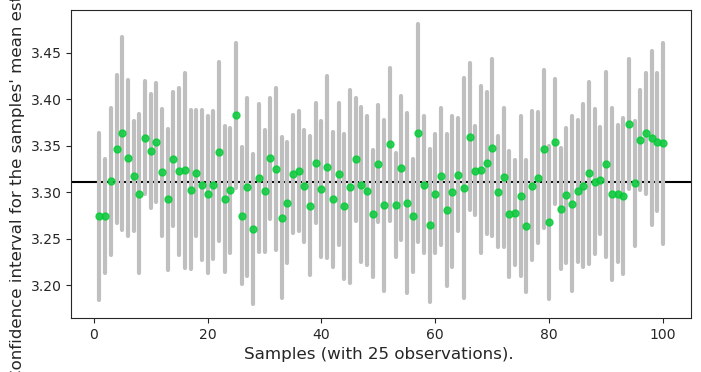

In [21]:
''' observe the output plot while changing the Confidence level, 
no of samples and no of times the test is performed '''

# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

## Exercise 6

Now assume that only the good quality wines are distilled at one of the wineries. It is known they contain pH greater than and equal to 3.5. The sampled mean by a quality inspector was 3.56 for a batch of 15 such wines. What is the 95% CI for mean? 
 

In [22]:


# We are interested in only a wines which have pH greater than 3.5. 
# This becomes our population  of interest
rng = np.random.default_rng(rng_seed)

n = 15
alpha = 0.05

# Sample Mean
Xbar = 3.56

# Filtering data for higher quality wines with pH >= 3.5 
highquality = wine[wine['pH']>= 3.5]
sigma = highquality['pH'].std()


observations = rng.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print('The mean is :', mu, '& the Std deviation is:', sigma)


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print('We are', round(100*confidence,3), "% confident that the interval")
print("   ", CI , "contains the mean.")


The mean is : 3.5633333333333335 & the Std deviation is: 0.06229729031789735
We are 95.0 % confident that the interval
    [3.5284738005710556, 3.5915261994289445] contains the mean.


In [23]:
grader.check("q6")

q6 results: All test cases passed!

## Exercise 7

Using `stats.norm.interval()`, CI can be computed.  Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [24]:
n = 15
#alpha = 0.05
#Xbar = 3.56
se = sigma/np.sqrt(n)

CIs = stats.norm.interval(0.95,3.56, scale=se)
print('We are', round(100*confidence,3), "% confident that the interval")
print('   ', CIs , "contains the mean.")
       

We are 95.0 % confident that the interval
    (3.5284738005710556, 3.5915261994289445) contains the mean.


In [25]:
grader.check("q7")

q7 results: All test cases passed!

### Example - t distribution


If number of samples are low, it is better to use the t distribution.

Recall, the exercise from `nb.week4`.  An engineer working for Ford is interested in the population of all vehicles that have an engine size of 3.0L or larger, and is particular interested in $\mu$, the highway mileage (mpg). Assume the population is normally distributed. The sample mean among a random sample of 14 vehicles is 18.3 mpg, and the sample standard deviation is 5.1 mpg (note: $\sigma$ is unknown). What is the 95% CI for $\mu$?

In [26]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 14
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print('   ',  ci , "contains the mean.")



we are 95.0 % confident that the interval
    [15.355347668416327, 21.244652331583676] contains the mean.


## Exercise 8 

We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package - `scipy.stats.t()`

Apply `stats.t.interval()` function here to obatin the 95% CI, the sigma for this is known to be around 5.1. `xbar` is 18.3. The degrees of freedom are same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [27]:
# Use scipy.stats  
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n =14
dof = n-1
sigma = 5.1
se = 5.1/np.sqrt(n)
CIt = stats.t.interval(1-alpha,dof, loc=xbar,scale=se)
print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print("   ", CIt , "contains the mean.")

we are 95.0 % confident that the interval
    (15.355347668416327, 21.244652331583676) contains the mean.


In [28]:
grader.check("q8")

q8 results: All test cases passed!

### Example 

Calculate the standard error using `scipy.stats.sem()`

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}



In [29]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])
print('S.E from sigma and n is: ', se)
print(' and S.E from stats is also: ', sef)

S.E from sigma and n is:  0.016085091194337667
 and S.E from stats is also:  0.016085091194337667


## Exercise 9 

Now you have worked on `stats.normal.interval` and `stats.t.interval` to compute the CI. Try to solve the questions below.

 The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 observations and the mean was 3.7. Find the 90% confidence interval for of the mean.

In [30]:
# compute the S.E (standard Error) using the formula explained earlier. 
from scipy import stats
sigma = 2.0
n=150
xbar=3.7
se=sigma/np.sqrt(n)

# Use the most appropriate function: norm.interval or t.interval 
alpha = 0.10
# CIs = stats.norm.interval(...)
# CIs = stats.t.interval(...)
CIs_norm = stats.norm.interval(1-alpha, loc=xbar,scale=se)
#dof=n-1
#CIs_t = stats.t.interval(1-alpha, dof,loc=xbar,scale=se)
#choosing norm dist because samples are above 30
print('S.E (standard error) is: ', se)
print('we are', round(100*(1-alpha), 3), "% confident that the interval(normal) is")
print("   ", CIs_norm, "contains the mean.")
#print('we are', round(100*(1-alpha), 3), "% confident that the interval(t-distribution) is")
#print("   ", CIs_t, "contains the mean.")

S.E (standard error) is:  0.16329931618554522
we are 90.0 % confident that the interval(normal) is
    (3.4313965274935105, 3.9686034725064894) contains the mean.


In [31]:
grader.check("q9")

q9 results: All test cases passed!

### Extra Exercises 

Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset?
2. Distribution of sampled price?
3. CI for a case. 

In [32]:
avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [33]:
avacado['AveragePrice']

0     1.33
1     1.35
2     0.93
3     1.08
4     1.28
      ... 
7     1.63
8     1.71
9     1.87
10    1.93
11    1.62
Name: AveragePrice, Length: 18249, dtype: float64

1. What is the distribution of average price in the dataset?

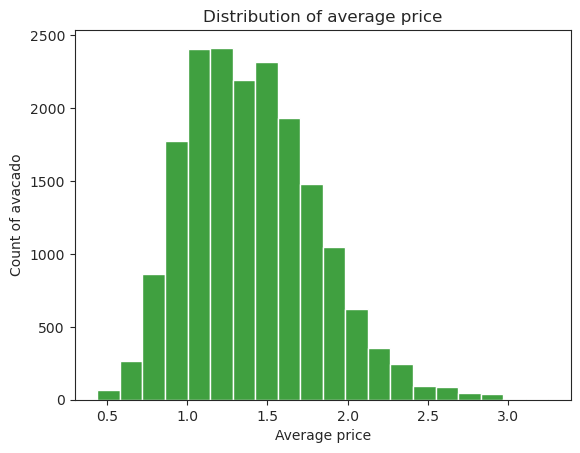

In [34]:
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.histplot(data= avacado['AveragePrice'], bins=20, color='green')
plt.title('Distribution of average price')
plt.ylabel('Count of avacado')
plt.xlabel('Average price')
plt.show()

2. Distribution of sampled price?
Let's consider n = 4000 samples

In [35]:
n=4000

In [36]:
sample_prices = avacado['AveragePrice'].sample(n=4000)
sample_prices

27    0.94
49    1.27
16    1.76
16    1.31
25    0.70
      ... 
43    1.67
19    1.97
29    1.08
47    0.98
5     2.01
Name: AveragePrice, Length: 4000, dtype: float64

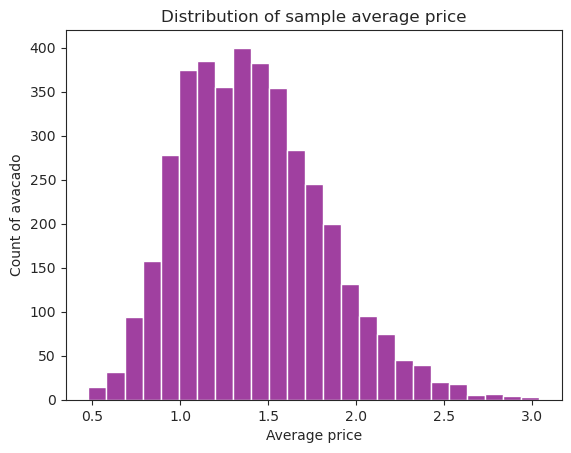

In [37]:
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.histplot(data= sample_prices, bins=25, color='purple')
plt.title('Distribution of sample average price')
plt.ylabel('Count of avacado')
plt.xlabel('Average price')
plt.show()

3.CI for a case.
Since the n value is greater than 30 , let's take normal distribution and compute the CI

In [38]:
xbar = avacado['AveragePrice'].mean()
#CI for 95%
n=avacado['AveragePrice'].shape[0]
alpha = 0.05
sigma = avacado['AveragePrice'].std()
se=sigma/np.sqrt(n)

CIs = stats.norm.interval(0.95,loc=xbar, scale=se)
print('We are', round(100*confidence,3), "% confident that the interval")
print('   ', CIs , "contains the mean.")
print('   ', xbar, "is the mean.")

We are 95.0 % confident that the interval
    (1.4001360957000322, 1.411820723851724) contains the mean.
    1.405978409775878 is the mean.


## Congratulations! You have finished Lab4! 

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the Lab 4 assignment on Gradescope, Gradescope will automatically submit a PDF file with your some of your answers to the Lab 4 - Figures assignment (making them easier to grade). 

**Important**: Please check that your responses were generated and submitted correctly to the Lab 4 - Figures Assignment. 

**You are responsible for ensuring your submission follows our requirements and that the PDF for Lab 4 - Figures answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with the submission, contact course staff well-ahead of the deadline. 

Make sure you have run all cells in your notebook **in order** before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [39]:
# Save your notebook first, then run this cell to export your submission.
grader.export()